## Pandas 실습 - 전 세계 코로나19 데이터 분석

* 분석 대상 데이터 : [Microsoft Bing COVID-19 Dataset](https://azure.microsoft.com/ko-kr/services/open-datasets/catalog/bing-covid-19-data/)
* Microsoft에서 서비스하는 검색엔진인 Bing에서 제공하는 "[Bing 코로나19 추적기](https://bing.com/covid)"에서 사용되는 실제 Dataset
* 전 세계 모든 지역의 확진, 사망 및 완치 사례가 포함되며, 데이터는 매일 업데이트 됨
* 20년 12월 3일 CSV 파일 기준 1,108,106행, 총 파일 크기 124MB
* 목표 : 나만의 코로나 19 Dashboard 만들기

### 필요 패키지 import
pandas + numpy + matplotlib %matplotlib inline 의 경우 matplotlib 로 출력하는 plot을 jupyter notebook 내에서 바로 출력하라는 jupyter notebook 특수 명령어임.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### CSV로 부터 DataFrame 생성하기

In [2]:
df = pd.read_csv("https://pandemicdatalake.blob.core.windows.net/public/curated/covid-19/bing_covid-19_data/latest/bing_covid-19_data.csv")
df.head(10)

,id,updated,confirmed,confirmed_change,deaths,deaths_change,recovered,recovered_change,latitude,longitude,iso2,iso3,country_region,admin_region_1,iso_subdivision,admin_region_2,load_time
0,338995,2020-01-21,262,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-12-03 00:06:08
1,338996,2020-01-22,313,51.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-12-03 00:06:08
2,338997,2020-01-23,578,265.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-12-03 00:06:08
3,338998,2020-01-24,841,263.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-12-03 00:06:08
4,338999,2020-01-25,1320,479.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-12-03 00:06:08
5,339000,2020-01-26,2014,694.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-12-03 00:06:08
6,339001,2020-01-27,2798,784.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-12-03 00:06:08
7,339002,2020-01-28,4593,1795.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-12-03 00:06:08
8,339003,2020-01-29,6065,1472.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-12-03 00:06:08
9,339004,2020-01-30,7818,1753.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-12-03 00:06:08


### 전 세계 일별 확진자/사망자 수 시각화

In [3]:
# 기본 DataFrame(df)에서 country_region이 'Worldwide'인 데이터만 추출하여 df_Worldwide라는 새로운 DataFrame 생성
df_Worldwide=df[df['country_region']=='Worldwide']

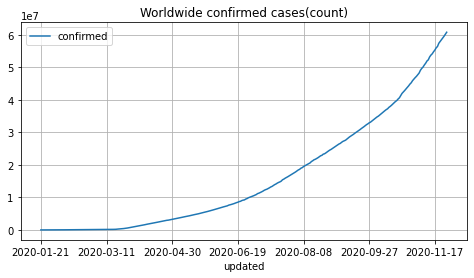

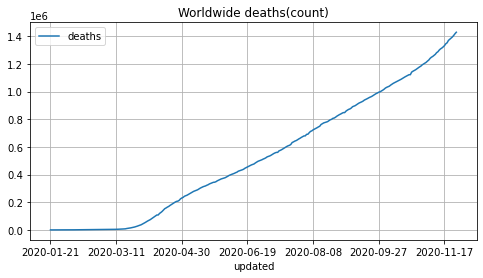

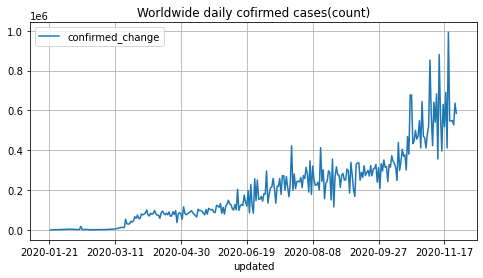

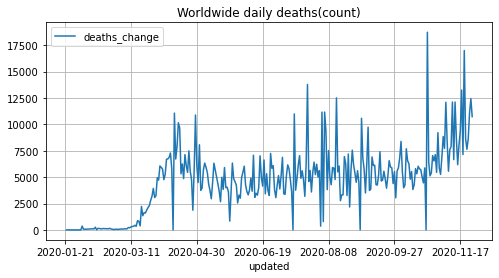

In [4]:
# 시각화. 일자별 누적 확진자 / 누적 사망자 / 일별 확진자 / 일별 사망자 graph 그리기
df_Worldwide.plot(kind='line',x='updated',y="confirmed",grid=True, title="Worldwide confirmed cases(count)", figsize=(8, 4))
df_Worldwide.plot(kind='line',x='updated',y="deaths",grid=True, title="Worldwide deaths(count)", figsize=(8, 4))
df_Worldwide.plot(kind='line',x='updated',y="confirmed_change",grid=True, title="Worldwide daily cofirmed cases(count)" , figsize=(8, 4))
df_Worldwide.plot(kind='line',x='updated',y="deaths_change",grid=True, title="Worldwide daily deaths(count)" , figsize=(8, 4))

### 국가별 누적 확진자/사망자 수

In [5]:
df_country = df[(df['country_region']!='Worldwide') & (df.admin_region_1.isnull())]
df_country_group = df_country[["country_region", "confirmed", "deaths"]].groupby("country_region").max().sort_values("confirmed", ascending=False)
df_country_group.head(30)

,confirmed,deaths
country_region,,
United States,12679685,250112.0
India,9266705,135223.0
Brazil,6238350,171974.0
Russia,2215533,38558.0
France,2196119,51914.0
Spain,1628208,44668.0
United Kingdom,1589301,57551.0
Italy,1538217,53677.0
Argentina,1407264,38216.0


### 국내 도시별 확진자/사망자 수 분석

In [6]:
# 국가명(country_region)이 "South Korea"이고 국내 전체 합계가 아닌 도시별 데이터만을 가져오기 위해 
# 도시명(admin_region_1)이 null(비어있는 값)이 아닌 경우만 가져와서 df_korea 생성
df_korea = df[(df['country_region']=='South Korea') & (~df.admin_region_1.isnull())]
df_korea.head(5)

,id,updated,confirmed,confirmed_change,deaths,deaths_change,recovered,recovered_change,latitude,longitude,iso2,iso3,country_region,admin_region_1,iso_subdivision,admin_region_2,load_time
326479,3140567,2020-04-02,122,NaN,3.0,NaN,NaN,NaN,35.18026,129.0711,KR,KOR,South Korea,Busan,NaN,NaN,2020-12-03 00:06:08
326480,3430147,2020-04-04,122,0.0,3.0,0.0,NaN,NaN,35.18026,129.0711,KR,KOR,South Korea,Busan,NaN,NaN,2020-12-03 00:06:08
326481,3751937,2020-04-05,122,0.0,3.0,0.0,NaN,NaN,35.18026,129.0711,KR,KOR,South Korea,Busan,NaN,NaN,2020-12-03 00:06:08
326482,4016597,2020-04-06,122,0.0,3.0,0.0,NaN,NaN,35.18026,129.0711,KR,KOR,South Korea,Busan,NaN,NaN,2020-12-03 00:06:08
326483,4277141,2020-04-07,123,1.0,3.0,0.0,NaN,NaN,35.18026,129.0711,KR,KOR,South Korea,Busan,NaN,NaN,2020-12-03 00:06:08


In [7]:
# groupby 함수를 통하여 도시명(admin_region_1)으로 그룹화 하고 confirmed, deaths 수치의 최대값(=가장 최신의 확진자/사망자 수)을 가져옴
# .sort_values("정렬할 기준 열(conlumn) 이름", ascending=True/False[오름차순/내림차순])
df_province = df_korea[["admin_region_1", "confirmed", "deaths"]].groupby("admin_region_1").max().sort_values("confirmed", ascending=False)
df_province.head(20)

,confirmed,deaths
admin_region_1,,
Seoul,8113,88.0
Daegu,7224,199.0
Gyeonggi,6864,112.0
North Gyeongsang,1681,57.0
Incheon,1305,11.0
South Chungcheong,833,8.0
Busan,683,15.0
Gwangju,646,3.0
Gangwon,583,6.0


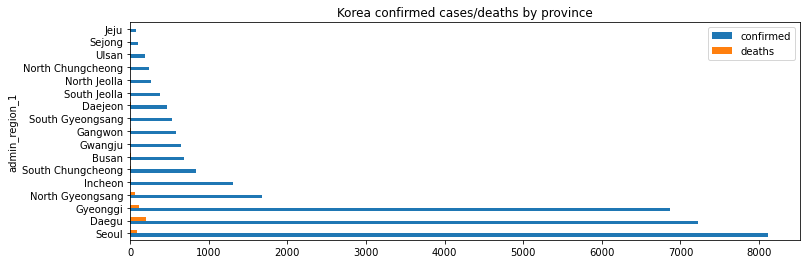

In [8]:
df_province.plot(kind="barh", figsize=(12, 4), title="Korea confirmed cases/deaths by province")

### 국내 일자/도시별 확진자 수 변화 시각화

In [9]:
# .pivot 함수의 경우 Excel의 피벗 테이블 기능과 유사하게 주어진 dataframe의 행/열 데이터 구조를 변환하는 역할
data_pivot_by_date = df_korea.pivot(index='updated', columns='admin_region_1', values='confirmed_change')
data_pivot_by_date.head(10)

admin_region_1,Busan,Daegu,Daejeon,Gangwon,Gwangju,Gyeonggi,Incheon,Jeju,North Chungcheong,North Gyeongsang,North Jeolla,Sejong,Seoul,South Chungcheong,South Gyeongsang,South Jeolla,Ulsan
updated,,,,,,,,,,,,,,,,,
2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,0.0,27.0,0.0,1.0,0.0,23.0,3.0,0.0,0.0,1.0,0.0,0.0,22.0,1.0,1.0,0.0,NaN
2020-04-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,1.0,33.0,3.0,5.0,1.0,28.0,3.0,3.0,0.0,7.0,1.0,0.0,39.0,2.0,4.0,0.0,NaN
2020-04-08,2.0,9.0,0.0,2.0,0.0,6.0,4.0,0.0,0.0,3.0,1.0,0.0,11.0,0.0,1.0,0.0,0.0
2020-04-09,0.0,4.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,3.0,0.0,0.0,12.0,1.0,2.0,0.0,0.0
2020-04-10,1.0,4.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2020-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN


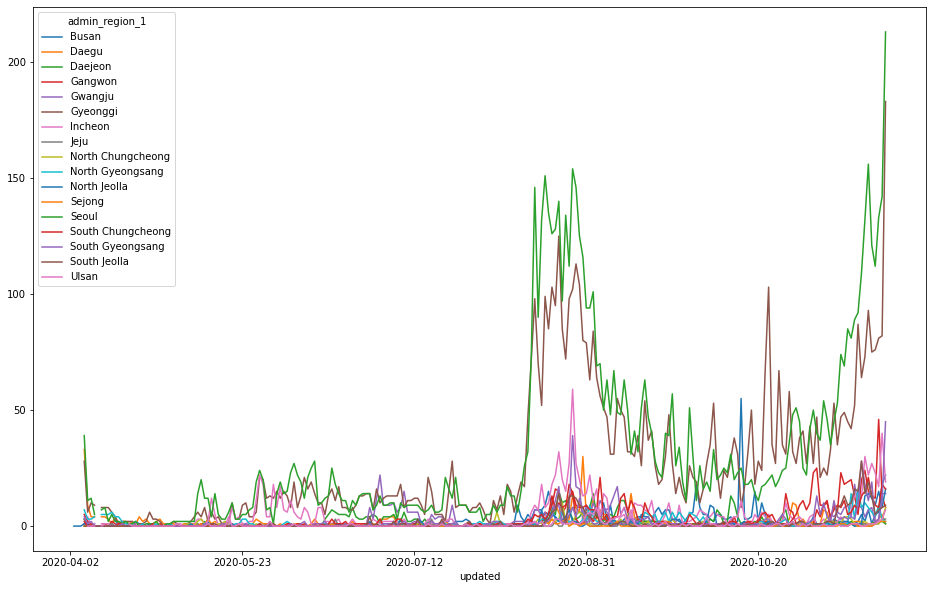

In [10]:
# 그래프 그리기
data_pivot_by_date.plot(figsize=(16, 10))